In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
chems = pd.read_excel('AquaticReport.xlsx')
chems.head(3)

,CAS Number,Chemical Name,Chemical Grade,Chemical Analysis,Chemical Purity,Species Scientific Name,Species Common Name,Species Group,Organism Lifestage,Organism Age,...,BCF 3 Min,BCF 3 Max Op,BCF 3 Max,BCF 3 Unit,Author,Reference Number,Title,Source,Publication Year,Summary of Additional Parameters
0,72208,"3,4,5,6,9,9-Hexachloro-1a,2,2a,3,6,6a,7,7a-oct...",Not reported,Unmeasured,NR,Rana temporaria,Frog,Amphibians,Tadpole,8,...,NaN,NaN,NaN,NaN,"Wohlgemuth,E.",8480,Toxicity of Endrin to Some Species of Aquatic ...,Prirodoved. Pr. Ust. Akad. Ved Brne11(6): 1-38,1977,Purity: NR - NR | Organism Age: NR - NR Da...
1,72208,"3,4,5,6,9,9-Hexachloro-1a,2,2a,3,6,6a,7,7a-oct...",Not reported,Unmeasured,NR,Pseudacris triseriata ssp. triseriata,Western Chorus Frog,Amphibians,Tadpole,7,...,NaN,NaN,NaN,NaN,"Sanders,H.O.",2891,Pesticide Toxicities to Tadpoles of the Wester...,Copeia2:246-251,1970,Purity: NR - NR | Organism Age: NR - NR Da...
2,72208,"3,4,5,6,9,9-Hexachloro-1a,2,2a,3,6,6a,7,7a-oct...",Not reported,Unmeasured,NR,Rana temporaria,Frog,Amphibians,Tadpole,16,...,NaN,NaN,NaN,NaN,"Wohlgemuth,E.",8480,Toxicity of Endrin to Some Species of Aquatic ...,Prirodoved. Pr. Ust. Akad. Ved Brne11(6): 1-38,1977,Purity: NR - NR | Organism Age: NR - NR Da...


In [3]:
chems = chems[chems['Conc 1 Type (Standardized)'] == 'Active ingredient']
chems = chems[chems['Conc 1 Mean (Standardized)'] != 'NR']
#chems = chems[chems['Endpoint'] != 'LC50']
chems = chems[chems['Conc 1 Mean Op (Standardized)'].isna()]

days = chems['Observed Duration (Days)'].mode()[0]
chems = chems[chems['Observed Duration (Days)'] == days]
chems.head()

,CAS Number,Chemical Name,Chemical Grade,Chemical Analysis,Chemical Purity,Species Scientific Name,Species Common Name,Species Group,Organism Lifestage,Organism Age,...,BCF 3 Min,BCF 3 Max Op,BCF 3 Max,BCF 3 Unit,Author,Reference Number,Title,Source,Publication Year,Summary of Additional Parameters
16,72208,"3,4,5,6,9,9-Hexachloro-1a,2,2a,3,6,6a,7,7a-oct...",Not reported,Measured,NR,Acris crepitans,Cricket Frog,Amphibians,Larva,NR,...,NaN,NaN,NaN,NaN,"Hall,R.J., and D.M. Swineford",15747,Acute Toxicities of Toxaphene and Endrin to La...,Toxicol. Lett.8(6): 331-336,1981,Purity: NR - NR | Organism Age: NR - NR No...
18,72208,"3,4,5,6,9,9-Hexachloro-1a,2,2a,3,6,6a,7,7a-oct...","Technical grade, technical product, technical ...",Measured,98,Lithobates sphenocephalus ssp. sphenocephalus,Florida Leopard Frog,Amphibians,"Pre-, sub-, semi-, near adult, or peripubertal",NR,...,NaN,NaN,NaN,NaN,"Hall,R.J., and D. Swineford",5250,Toxic Effects of Endrin and Toxaphene on the S...,Environ. Pollut. A.23(1): 53-65,1980,Purity: NR - NR | Organism Age: NR - NR No...
22,72208,"3,4,5,6,9,9-Hexachloro-1a,2,2a,3,6,6a,7,7a-oct...","Technical grade, technical product, technical ...",Measured,98,Lithobates sphenocephalus ssp. sphenocephalus,Florida Leopard Frog,Amphibians,Larva,NR,...,NaN,NaN,NaN,NaN,"Hall,R.J., and D. Swineford",5250,Toxic Effects of Endrin and Toxaphene on the S...,Environ. Pollut. A.23(1): 53-65,1980,Purity: NR - NR | Organism Age: NR - NR No...
23,72208,"3,4,5,6,9,9-Hexachloro-1a,2,2a,3,6,6a,7,7a-oct...",Not reported,Not reported,99,Pseudacris triseriata,"Striped, Northern Chorus Frog",Amphibians,Tadpole,NR,...,NaN,NaN,NaN,NaN,"Mayer,F.L.,Jr., and M.R. Ellersieck",6797,Manual of Acute Toxicity: Interpretation and D...,"USDI Fish and Wildlife Service, Publication No...",1986,Purity: NR - NR | Organism Age: NR - NR No...
28,72208,"3,4,5,6,9,9-Hexachloro-1a,2,2a,3,6,6a,7,7a-oct...","Technical grade, technical product, technical ...",Measured,98,Lithobates sphenocephalus ssp. sphenocephalus,Florida Leopard Frog,Amphibians,Larva,NR,...,NaN,NaN,NaN,NaN,"Hall,R.J., and D. Swineford",5250,Toxic Effects of Endrin and Toxaphene on the S...,Environ. Pollut. A.23(1): 53-65,1980,Purity: NR - NR | Organism Age: NR - NR No...


In [4]:
cols = ['CAS Number','Species Scientific Name', 'Species Common Name', 'Species Group', 'Conc 1 Type (Standardized)', 
       'Conc 1 Mean (Standardized)','Conc 1 Units (Standardized)','Observed Duration (Days)']
chems2 = chems[cols].copy()
chems2

,CAS Number,Species Scientific Name,Species Common Name,Species Group,Conc 1 Type (Standardized),Conc 1 Mean (Standardized),Conc 1 Units (Standardized),Observed Duration (Days)
16,72208,Acris crepitans,Cricket Frog,Amphibians,Active ingredient,0.01,AI mg/L,4
18,72208,Lithobates sphenocephalus ssp. sphenocephalus,Florida Leopard Frog,Amphibians,Active ingredient,0.005,AI mg/L,4
22,72208,Lithobates sphenocephalus ssp. sphenocephalus,Florida Leopard Frog,Amphibians,Active ingredient,0.006,AI mg/L,4
23,72208,Pseudacris triseriata,"Striped, Northern Chorus Frog",Amphibians,Active ingredient,0.18,AI mg/L,4
28,72208,Lithobates sphenocephalus ssp. sphenocephalus,Florida Leopard Frog,Amphibians,Active ingredient,0.006,AI mg/L,4
...,...,...,...,...,...,...,...,...
676,72208,Ischnura verticalis,Damselfly,Insects/Spiders,Active ingredient,0.0021,AI mg/L,4
680,72208,Pteronarcella badia,Stonefly,Insects/Spiders,Active ingredient,0.00054,AI mg/L,4
682,72208,Tipula sp.,Cranefly,Insects/Spiders,Active ingredient,0.012,AI mg/L,4
698,72208,Hexagenia bilineata,Mayfly,Insects/Spiders; Standard Test Species,Active ingredient,0.062,AI mg/L,4


In [5]:
chems2 = chems2[['Species Scientific Name','Conc 1 Mean (Standardized)']]
chems2.loc[:,'Conc 1 Mean (Standardized)'] = chems2.loc[:,'Conc 1 Mean (Standardized)'].astype(float)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [6]:
chems2 = chems2.groupby('Species Scientific Name', as_index=False)['Conc 1 Mean (Standardized)'].median()
chems2 = chems2.sort_values(by=['Conc 1 Mean (Standardized)'])
chems2.reset_index(drop=True,inplace=True)
chems2

,Species Scientific Name,Conc 1 Mean (Standardized)
0,Claassenia sabulosa,0.000076
1,Perca flavescens,0.000150
2,Oncorhynchus clarkii,0.000152
3,Euphlyctis hexadactylus,0.000210
4,Micropterus salmoides,0.000310
5,Cyprinus carpio,0.000320
6,Hesperoperla pacifica,0.000390
7,Oncorhynchus kisutch,0.000390
8,Ictalurus punctatus,0.000420
9,Salvelinus fontinalis,0.000473


In [7]:
def plot_SSD (data):
    #finding order of magnitude of min and of max(+1)
    low = data.iloc[:,1].min()
    high = data.iloc[:,1].max()

    xmin, xmax = math.floor(math.log(low, 10)), (math.floor(math.log(high, 10)))+1

    plt.figure(figsize=(6,4.5))
    #plotting data points
    a = data.iloc[:,1]

    n_species = data.shape[0]
    perc_val = np.arange(n_species)+1
    percent = [(x-0.5)/data.shape[0] for x in perc_val]

    plt.scatter(a, percent,color='black')


    #plotting fitted lognormal function
    s, loc, scale = stats.lognorm.fit(a)

    x = np.logspace(xmin, xmax, 100)
    y = [stats.lognorm.cdf(x, s, loc=0, scale=scale) for x in x]
    plt.plot(x,y,color='red')

    #adjusting x-axis
    plt.xscale("log")
    plt.gca().set_xlim([math.pow(10,xmin), math.pow(10, xmax)])

    plt.show()

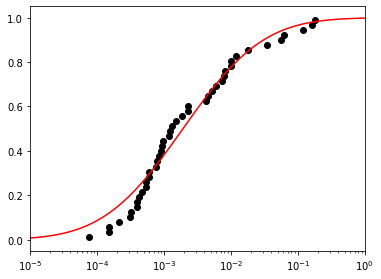

In [8]:
plot_SSD(chems2)